In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rootdir = 'data/papers'
contents = []
i = 0
source = []
errors = []
doc = []
year = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                doc.append(path.split('_')[1][:3])
                year.append(int(path.split('/')[-1][:4]))
                try:
                    text = file.read()
                    if len(text)> 10 :
                        contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [6]:
#contents_method_ref = [content[content.find('Methods'):content.find('References')] for content in contents]

In [7]:
count = 0
for i,elem in  enumerate(contents): 
    if elem.find('Methods') == -1 & elem.find('Method') == -1 & elem.find('Proceedings')==-1& elem.find('Procedure')==-1: 
        print(doc[i],i)
        count = count+1 
         #elem.find('Context and methods') == -1
        
        

526 9
527 59
525 76
524 129
520 142
521 199
199 738
472 892
155 906
66. 973
831 999
158 1041


In [8]:
def find_methodology(elem): 
    new = ''
    ind = elem.find('Methods')
    end = elem.find('References')
    if ind != -1 :
        new = elem[ind:end-10]
    else :
        if elem.find('Method') != -1: 
            ind = elem.find('Method')
            new = elem[ind:end-10]
        else :
            if elem.find('Proceedings') != -1: 
                ind = elem.find('Proceedings')
                new = elem[ind:end-10]
            else :
                if elem.find('Procedure') != -1 : 
                    ind = elem.find('Procedure')
                    new = elem[ind:end-10]
          
    return new


In [9]:
tmp = pd.DataFrame(contents)

In [10]:
#drop the malformed texts
tmp.drop(8,inplace = True)

In [11]:
#finf contents with method and procedure and preceedings
tmp[0] = tmp[0].apply(lambda x : find_methodology(x))

In [12]:
tmp[0][0][:-1]

'Methods and data sources\n\nParticipants at the time of the study included 10 undergraduate instructors, however for the scope of this paper I\nelaborate on 3 instructors (Sarah, Zena, and Abby), who identify as first-generation college students (FGCS).\nSources of data include annual surveys and interviews as well as peer and classroom observations of interactions\nconducted throughout 2 academic years: Fall 2015- Spring 2017.\nAnalytic Approach: Trajectories of Identification. I use sociocultural theory (Wertsch, 1998) to\nconceptualize learning environments as places where participants connect their past, present, and future selves,\nand in this way, make sense of who they are which further leads to how they participate in those environments.\nUsing the trajectories of identification framework (Polman & Miller, 2010) I theorize participation and identity\nas dynamic and co-constructed via participation in social interactions and activities. To further analyze trajectories\nof ident

In [13]:
def termination (x):
    end = -1
    if elem.find('Findings') == -1: 
        end = elem.find('Findings') 
    else :
        if elem.find('Result')==-1:
            end = elem.find('Result')
        else :
            if elem.find('Anticipated results')==-1:
                end = elem.find('Anticipated results')
            else: 
                if elem.find('Validation results') == -1:
                    end = elem.find('Validation results')
                else :
                    if elem.find('Major findings') == -1:
                        end = elem.find('Major findings')
                    else :
                        if elem.find('Outcomes') == -1: 
                            end = elem.find('Outcomes')
                        else :
                            if elem.find('Conclusions') == -1: 
                                end = elem.find('Conclusions')
    return x[:end]

In [14]:
count = 0
for i,elem in enumerate(tmp[0]):
    if elem.find('Findings') == -1 & elem.find('Results') == -1 & elem.find('Result')==-1 & elem.find('Anticipated results')==-1 & elem.find('Validation results') == -1 & elem.find('Major findings') == -1 & elem.find('Outcomes') == -1 &elem.find('Conclusions') == -1:
        count = count+1
        

In [15]:
tmp[0] = tmp[0].apply(lambda x : termination(x))

In [16]:
#clean text 
tmp[0] = tmp[0].apply(lambda x : x.replace('Methods\r\r','').replace('\r','').replace('Methods','').replace('Method','').replace('Proceedings','').replace('isls',' isls '))


In [17]:
import string
printable = set(string.printable)
# printable

In [18]:
tmp[0] = tmp[0].apply(lambda y : filter(lambda x: x in printable, y))
tmp[0] = tmp[0].apply(lambda y : ''.join(y))

In [19]:
print(tmp[0][1])



Our study was carried out as a critical ethnography over a two-year period. Critical ethnography was selected as
our methodology because of its explicit focus on participatory critique, transformation, empowerment, and
social justice. Critical ethnography is grounded in the idea that researchers can use the tools of ethnography to
conduct empirical research in an unjust world in ways that examine and transform inequalities from multiple
perspectives (Trueba, 1999). Critical ethnography provided an approach in which to politicize the interaction
between actors and the social structures through which they act, grounded in the belief that these relationships
are never neutral. This approach was important as we attempted to make sense of how youth, who are
positioned in particular ways due to race, gender and class, engage in makerspace activities.
Our study is grounded in middle school youths experiences in two different makerspace contexts,
Michigan and North Carolina, over the course 

In [20]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

import warnings

stemmer = SnowballStemmer('english')

def review_to_words( raw_methodology ):

    # Remove HTML
    review_text = BeautifulSoup(raw_methodology).get_text() 
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
     
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    
    # Stem words
    #stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    # Join the words back into one string separated by space and return the result
    return( " ".join( meaningful_words ))

In [21]:
clean_txt = tmp[0].apply(review_to_words)

In [22]:
clean_txt = clean_txt[clean_txt!= '']

In [23]:
clean_txt[:10]

0     data sources participants time study included ...
1     study carried critical ethnography two year pe...
2     figure data generated trials direct impact cla...
3     unit energy implemented th grade two schools u...
4     ological applications cscfl quantitative quali...
5     participants total undergraduate students calc...
6     isls solve problems reason evidence make sense...
7     isls plans part pd racially diverse research t...
10    isls clustered nine potentially productive con...
11    isls methods preliminary findings first phase ...
Name: 0, dtype: object

In [24]:
titles = [content[:content.find('\r')] for content in contents ]
titles = pd.DataFrame(titles)

In [25]:
titles = titles.iloc[clean_txt.index]

In [26]:
titles[0] = titles[0].apply(lambda y : filter(lambda x: x in printable, y))

In [27]:
len(titles)

1043

In [28]:
# apply a TFIDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1500,ngram_range=(1,3))
features = vectorizer.fit_transform(clean_txt)
features = features.toarray()

In [29]:
# Method for loading a text file in a DataFrame (each row corresponds to a line)
def load_data(path):
    with open(path) as file:
        words_file = pd.DataFrame([line.rstrip() for line in file])
    return words_file

In [30]:
# Method to load glove vectors from glove.6B, which is a file from stanford containing pre-trained glove vectors on
# wikipedia, which is more appropriate in our case than twitter glove vectors even if it contains less words than for twitter.
def load_glove(path,n =100,):
    """Loading glove vectors
    n is the dimension of the vectors, can be 50, 100, 200 or 300"""
    glove_vectors_100 = load_data(path)
    glove_vectors_100[0] = glove_vectors_100[0].apply(lambda x : x.split(' ',1))
    words = pd.DataFrame(glove_vectors_100[0].apply(lambda x : x[0]))
    words['Vectors']= glove_vectors_100[0].apply(lambda x : x[1])
    del(glove_vectors_100)
    words.rename(columns={0:'Words'},inplace=True)
    words['Words'] = words.apply(lambda x : [elem.replace('<','').replace('>','') for elem in x ])
    words.set_index('Words',inplace=True)
    return words

In [31]:
#load the vectors downloaded before with your path
path = '/Users/zhenchensu/Downloads/glove.6B/glove.6B.100d.txt'
csv_glove = load_glove(path)

In [32]:
csv_glove['Vectors'] = csv_glove['Vectors'].apply(lambda x : [float(x) for x in x.split()])


In [33]:
dict_of_words_vect = csv_glove.to_dict()['Vectors']


In [34]:
indices = features.nonzero()

In [35]:
indices

(array([   0,    0,    0, ..., 1042, 1042, 1042]),
 array([   1,    3,    4, ..., 1493, 1494, 1495]))

In [36]:
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}


In [37]:
doc_vectors = []
ind = 0
avg = np.zeros(100)
count = 0
for i,j in zip(indices[0],indices[1]):
    if i == ind : 
        try :
            #print(dict_of_words_vect[str(inv_map[j])])
            
            avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j])])
            count = count +1 
        except KeyError:
            if len(str(inv_map[j]).split())>1: 
                try :
                    avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j]).split()[0]])
                    avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j]).split()[1]])
                    count = count +1 
                except KeyError:
                    continue
            else :
                continue
    else : 
        doc_vectors.append(avg)
        ind = i
        count = 0
        try : 
            avg = np.zeros(100) + features[i,j]* np.array(dict_of_words_vect[str(inv_map[j])])
            count = count +1 
        except KeyError:
            avg = np.zeros(100)
doc_vectors.append(avg)

In [38]:
len(doc_vectors)

1043

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_scaled_glove = StandardScaler().fit_transform(doc_vectors)


pca_glove = PCA(n_components=50)

features_pca_glove = pca_glove.fit_transform(features_scaled_glove)

### Kmeans

In [40]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter

def see_clusters(X,range_n_clusters):
    silhouette = []
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        silhouette.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette, range_n_clusters

For n_clusters = 2 The average silhouette_score is : 0.166765278365272
For n_clusters = 3 The average silhouette_score is : 0.09357851911289544
For n_clusters = 4 The average silhouette_score is : 0.09427082114255926
For n_clusters = 5 The average silhouette_score is : 0.08319299322746189
For n_clusters = 6 The average silhouette_score is : 0.0792110200775612
For n_clusters = 7 The average silhouette_score is : 0.07180819180244595
For n_clusters = 10 The average silhouette_score is : 0.06441772672041812
For n_clusters = 15 The average silhouette_score is : 0.06537707941926628


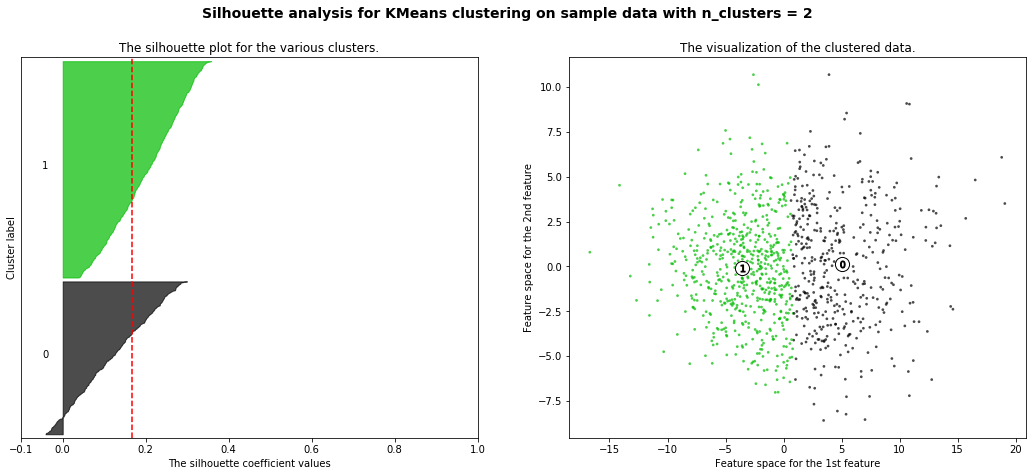

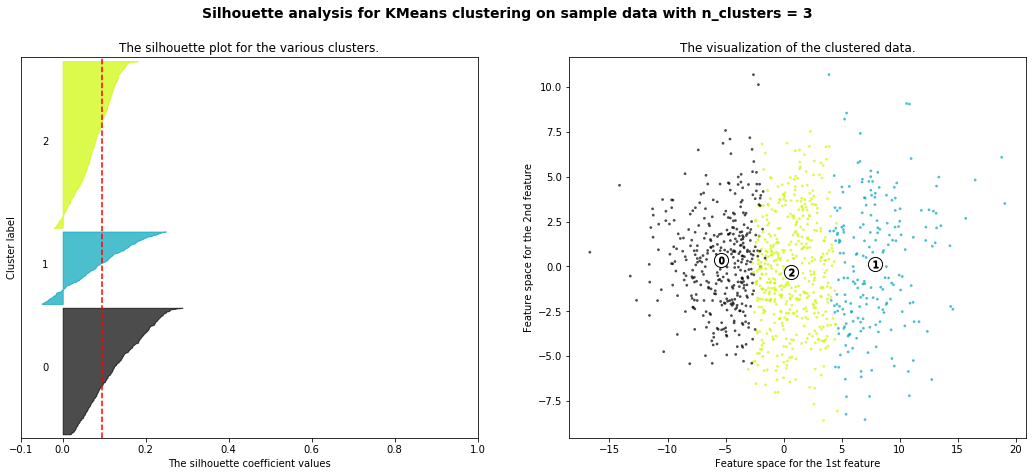

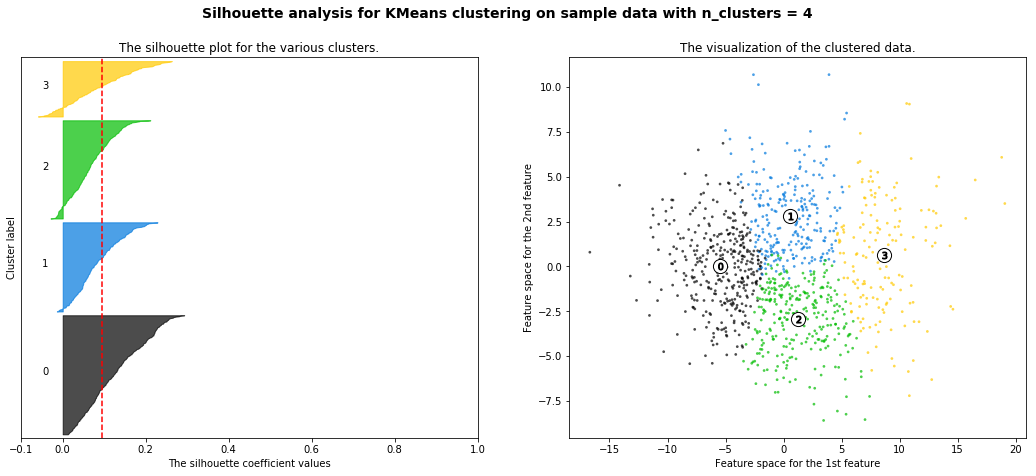

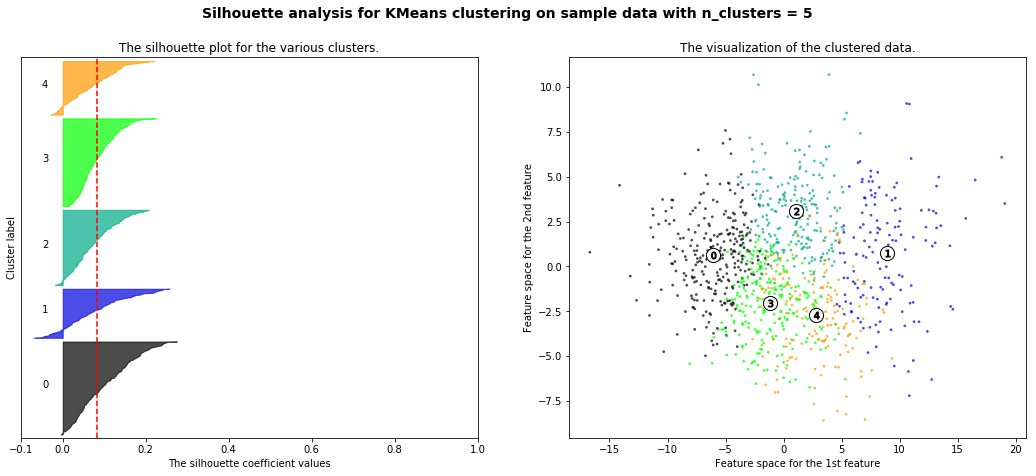

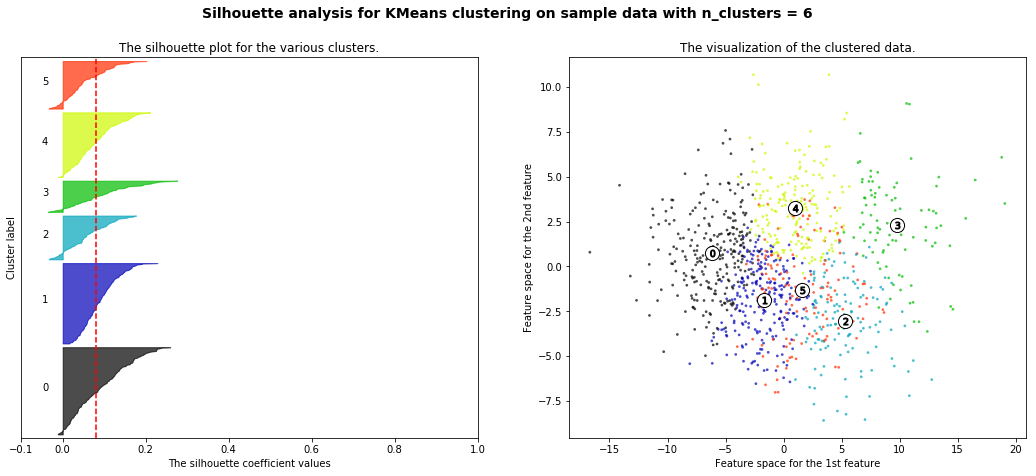

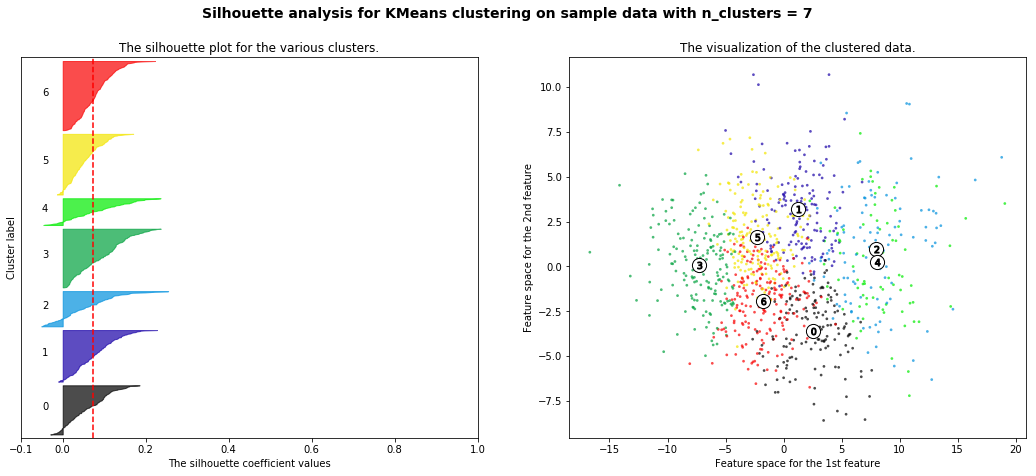

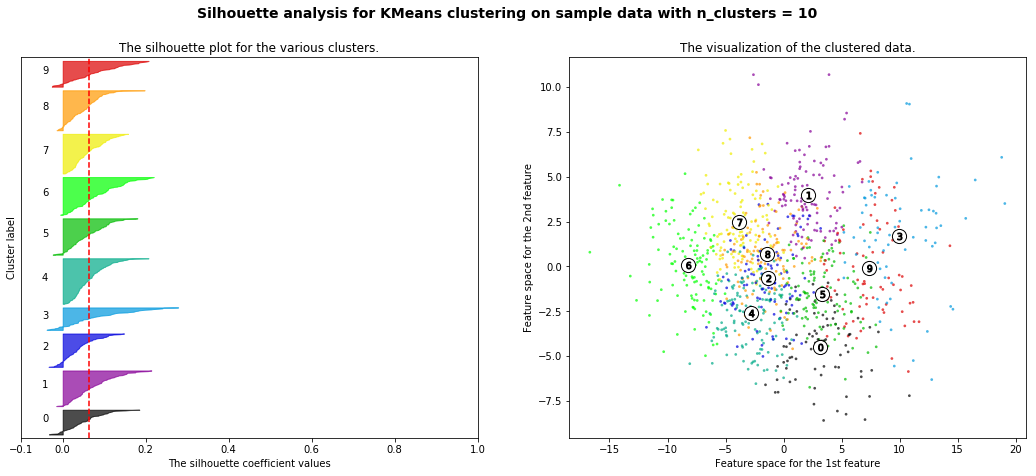

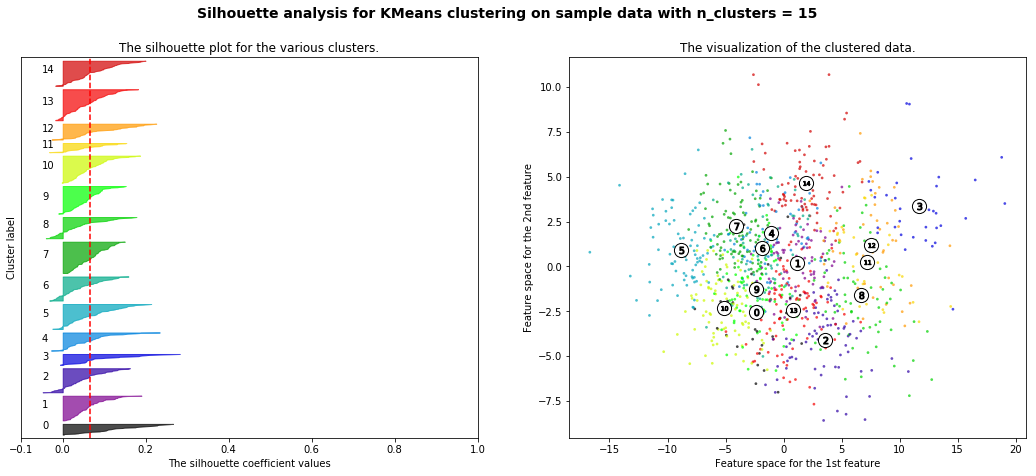

([0.166765278365272,
  0.09357851911289544,
  0.09427082114255926,
  0.08319299322746189,
  0.0792110200775612,
  0.07180819180244595,
  0.06441772672041812,
  0.06537707941926628],
 [2, 3, 4, 5, 6, 7, 10, 15])

In [41]:
see_clusters(features_pca_glove,[2,3,4,5,6,7,10,15])

In [42]:
import matplotlib as mpl
from sklearn.manifold import MDS

def plot_cos_dist_clust(X,clusters):
    MDS()
    dist = 1 - cosine_similarity(X)

    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]
    %matplotlib inline 

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters,title=np.array(titles)[np.array(titles)!=''])) 

    #group by cluster
    groups = df.groupby('label')


    # set up plot
    fig, ax = plt.subplots(figsize=(60, 40)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                 color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  


    plt.savefig('clusters_methodology.png')
    plt.show() #show the plot
    
    return 

In [43]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#000000',6 : '#0000FF' }


In [44]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
%time km.fit(features_pca_glove)
clusters = km.labels_.tolist()

CPU times: user 202 ms, sys: 16.7 ms, total: 219 ms
Wall time: 112 ms


/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:51: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


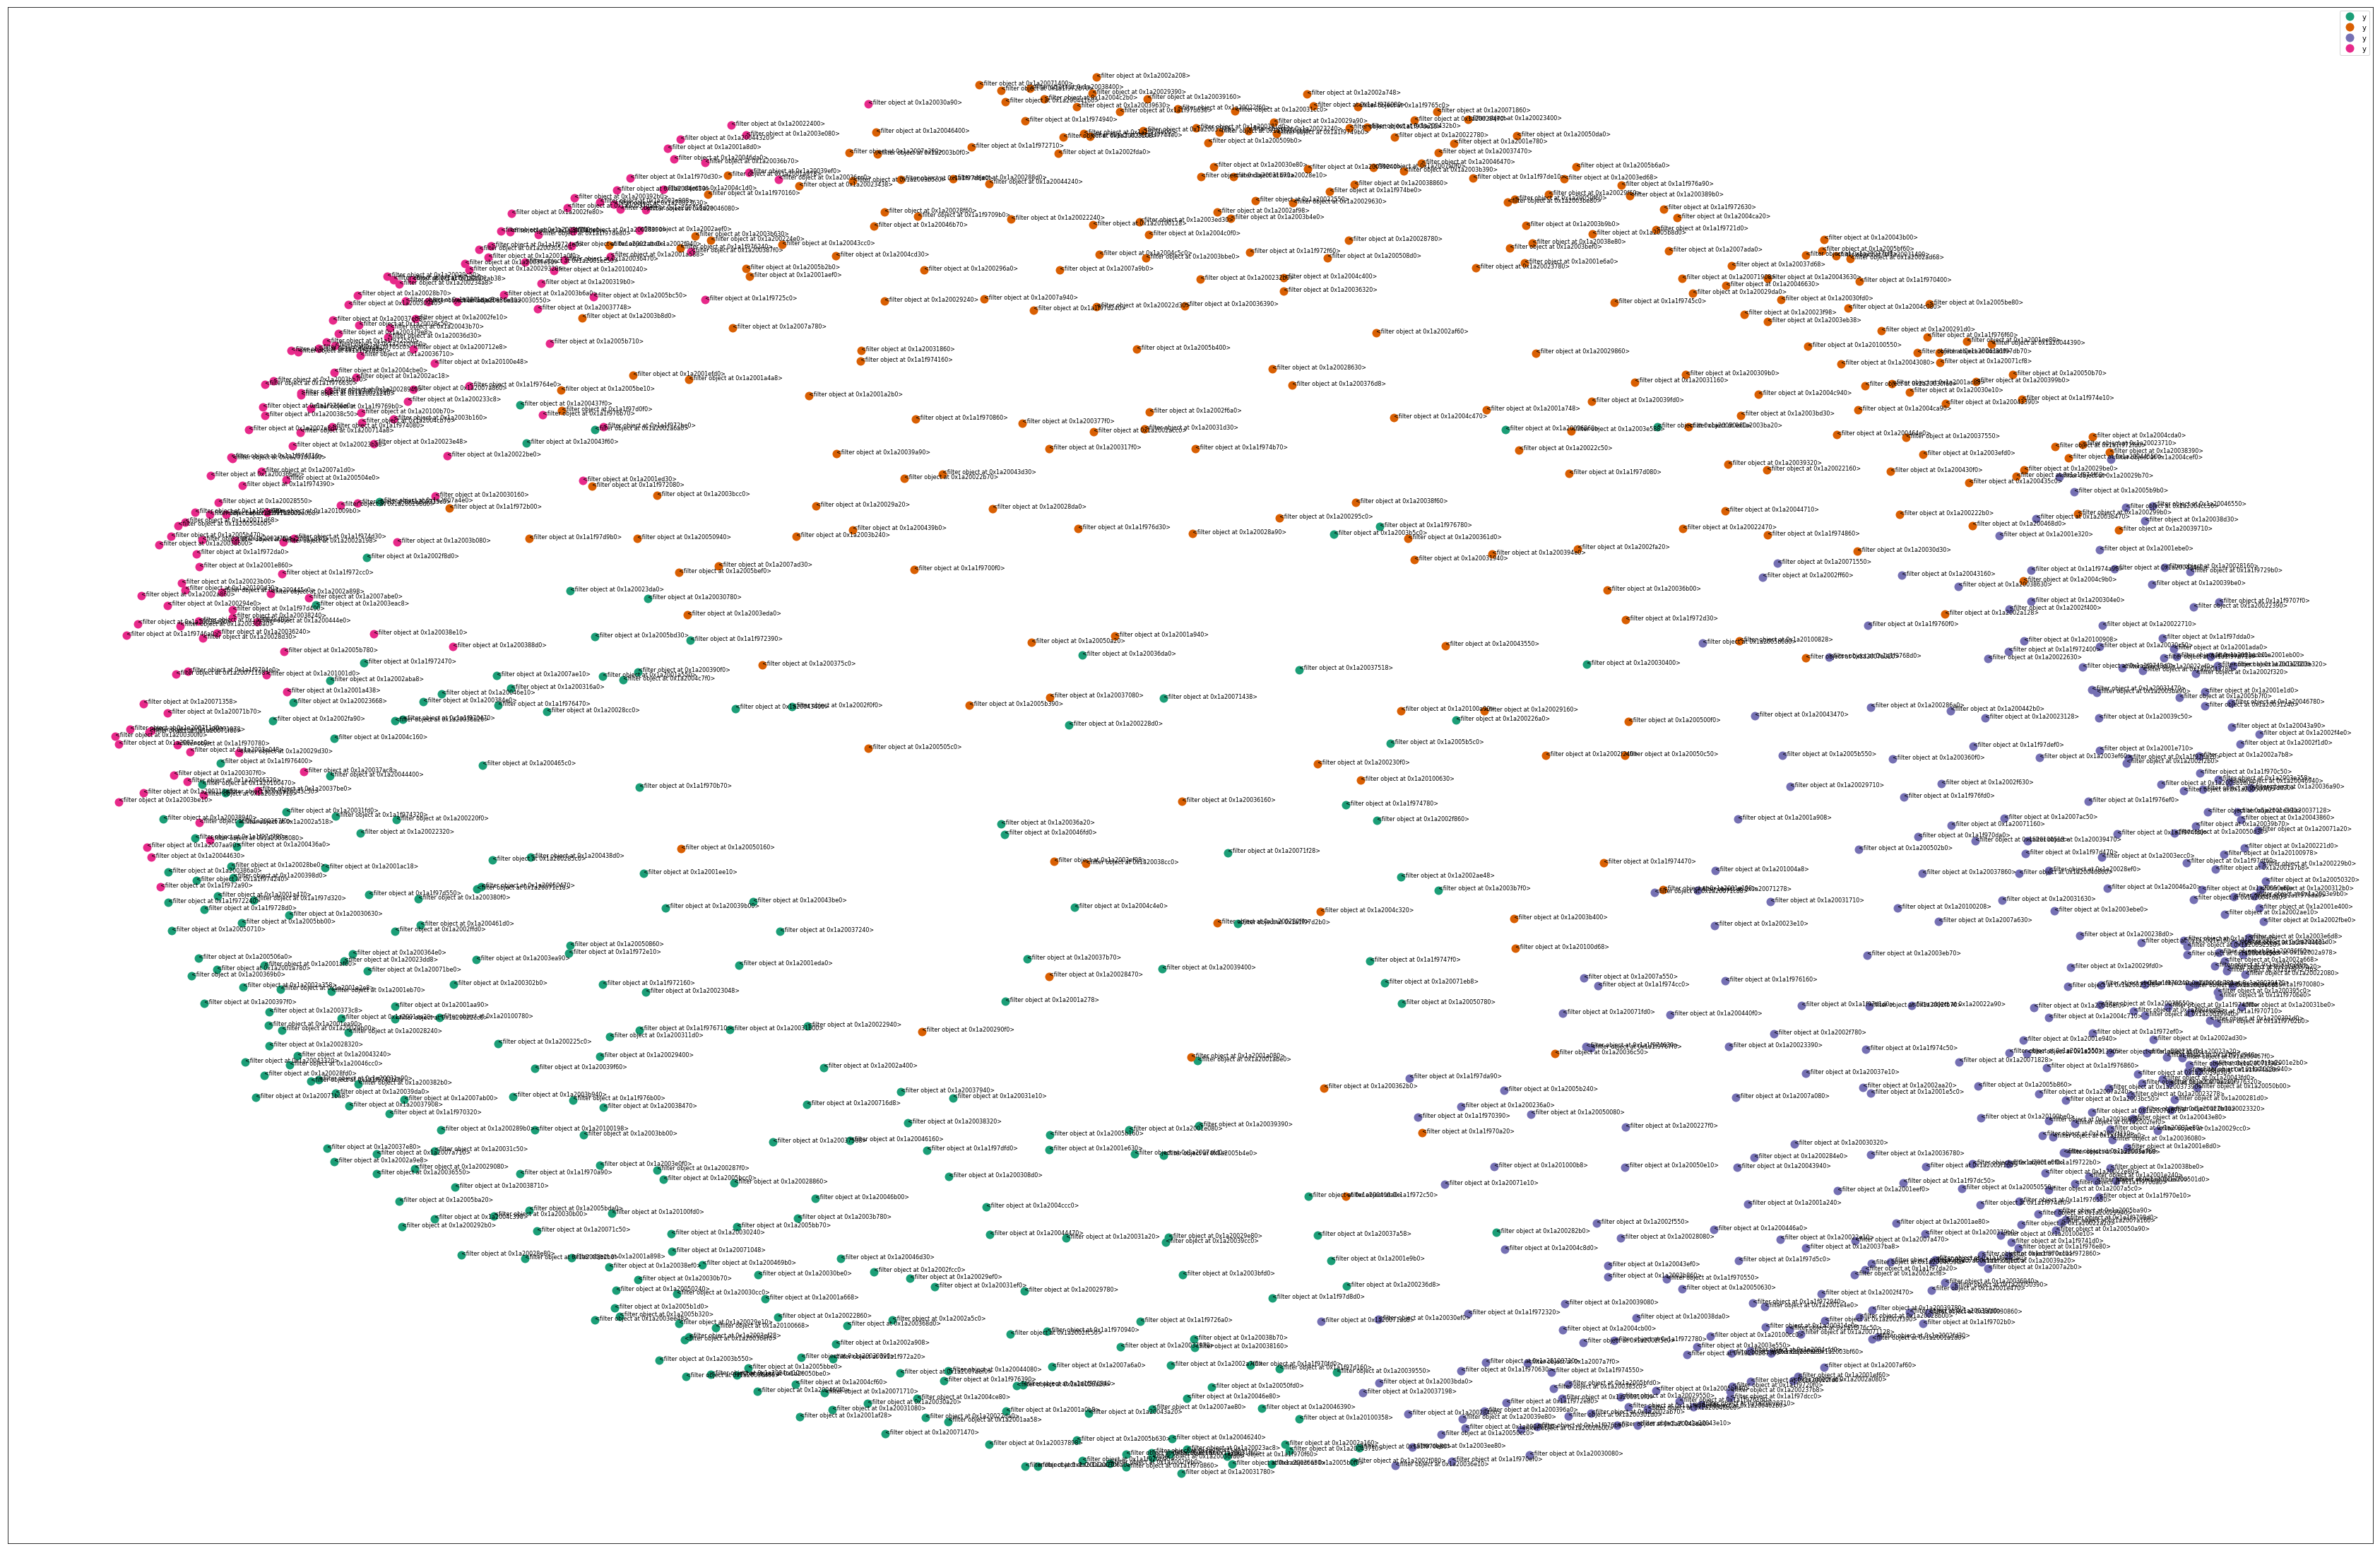

In [45]:
plot_cos_dist_clust(features_pca_glove,clusters)

In [46]:
methodology_cluster = pd.DataFrame(zip(list(titles[0]),clusters))

TypeError: data argument can't be an iterator

In [ ]:
methodology_cluster.rename(columns={1:'clusters',0:'titles'},inplace=True)

In [ ]:
methodology_cluster.groupby(clusters).get_group(1).head()